In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [159]:
data = pd.read_csv('../data/data_cleaned.csv')
data

,age,balance,housing,loan,day,duration,campaign,pdays,previous,y,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.769231,0.583969,1,0,0.133333,0.406299,0.000000,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.500000,0.360123,1,0,0.133333,0.233071,0.000000,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.288462,0.357264,1,1,0.133333,0.114961,0.000000,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.557692,0.516518,1,0,0.133333,0.140157,0.000000,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.326923,0.381512,1,0,0.133333,0.214173,0.000000,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34914,0.365385,0.508259,0,0,0.500000,0.519685,0.142857,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34915,0.307692,0.416031,0,0,0.533333,0.348031,0.000000,0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34916,0.096154,0.369017,0,0,0.533333,0.414173,0.000000,0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34917,0.134615,0.410525,0,1,0.533333,0.603150,0.142857,0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [160]:
data.columns

Index(['age', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign',
       'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'month_apr', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

<Axes: >

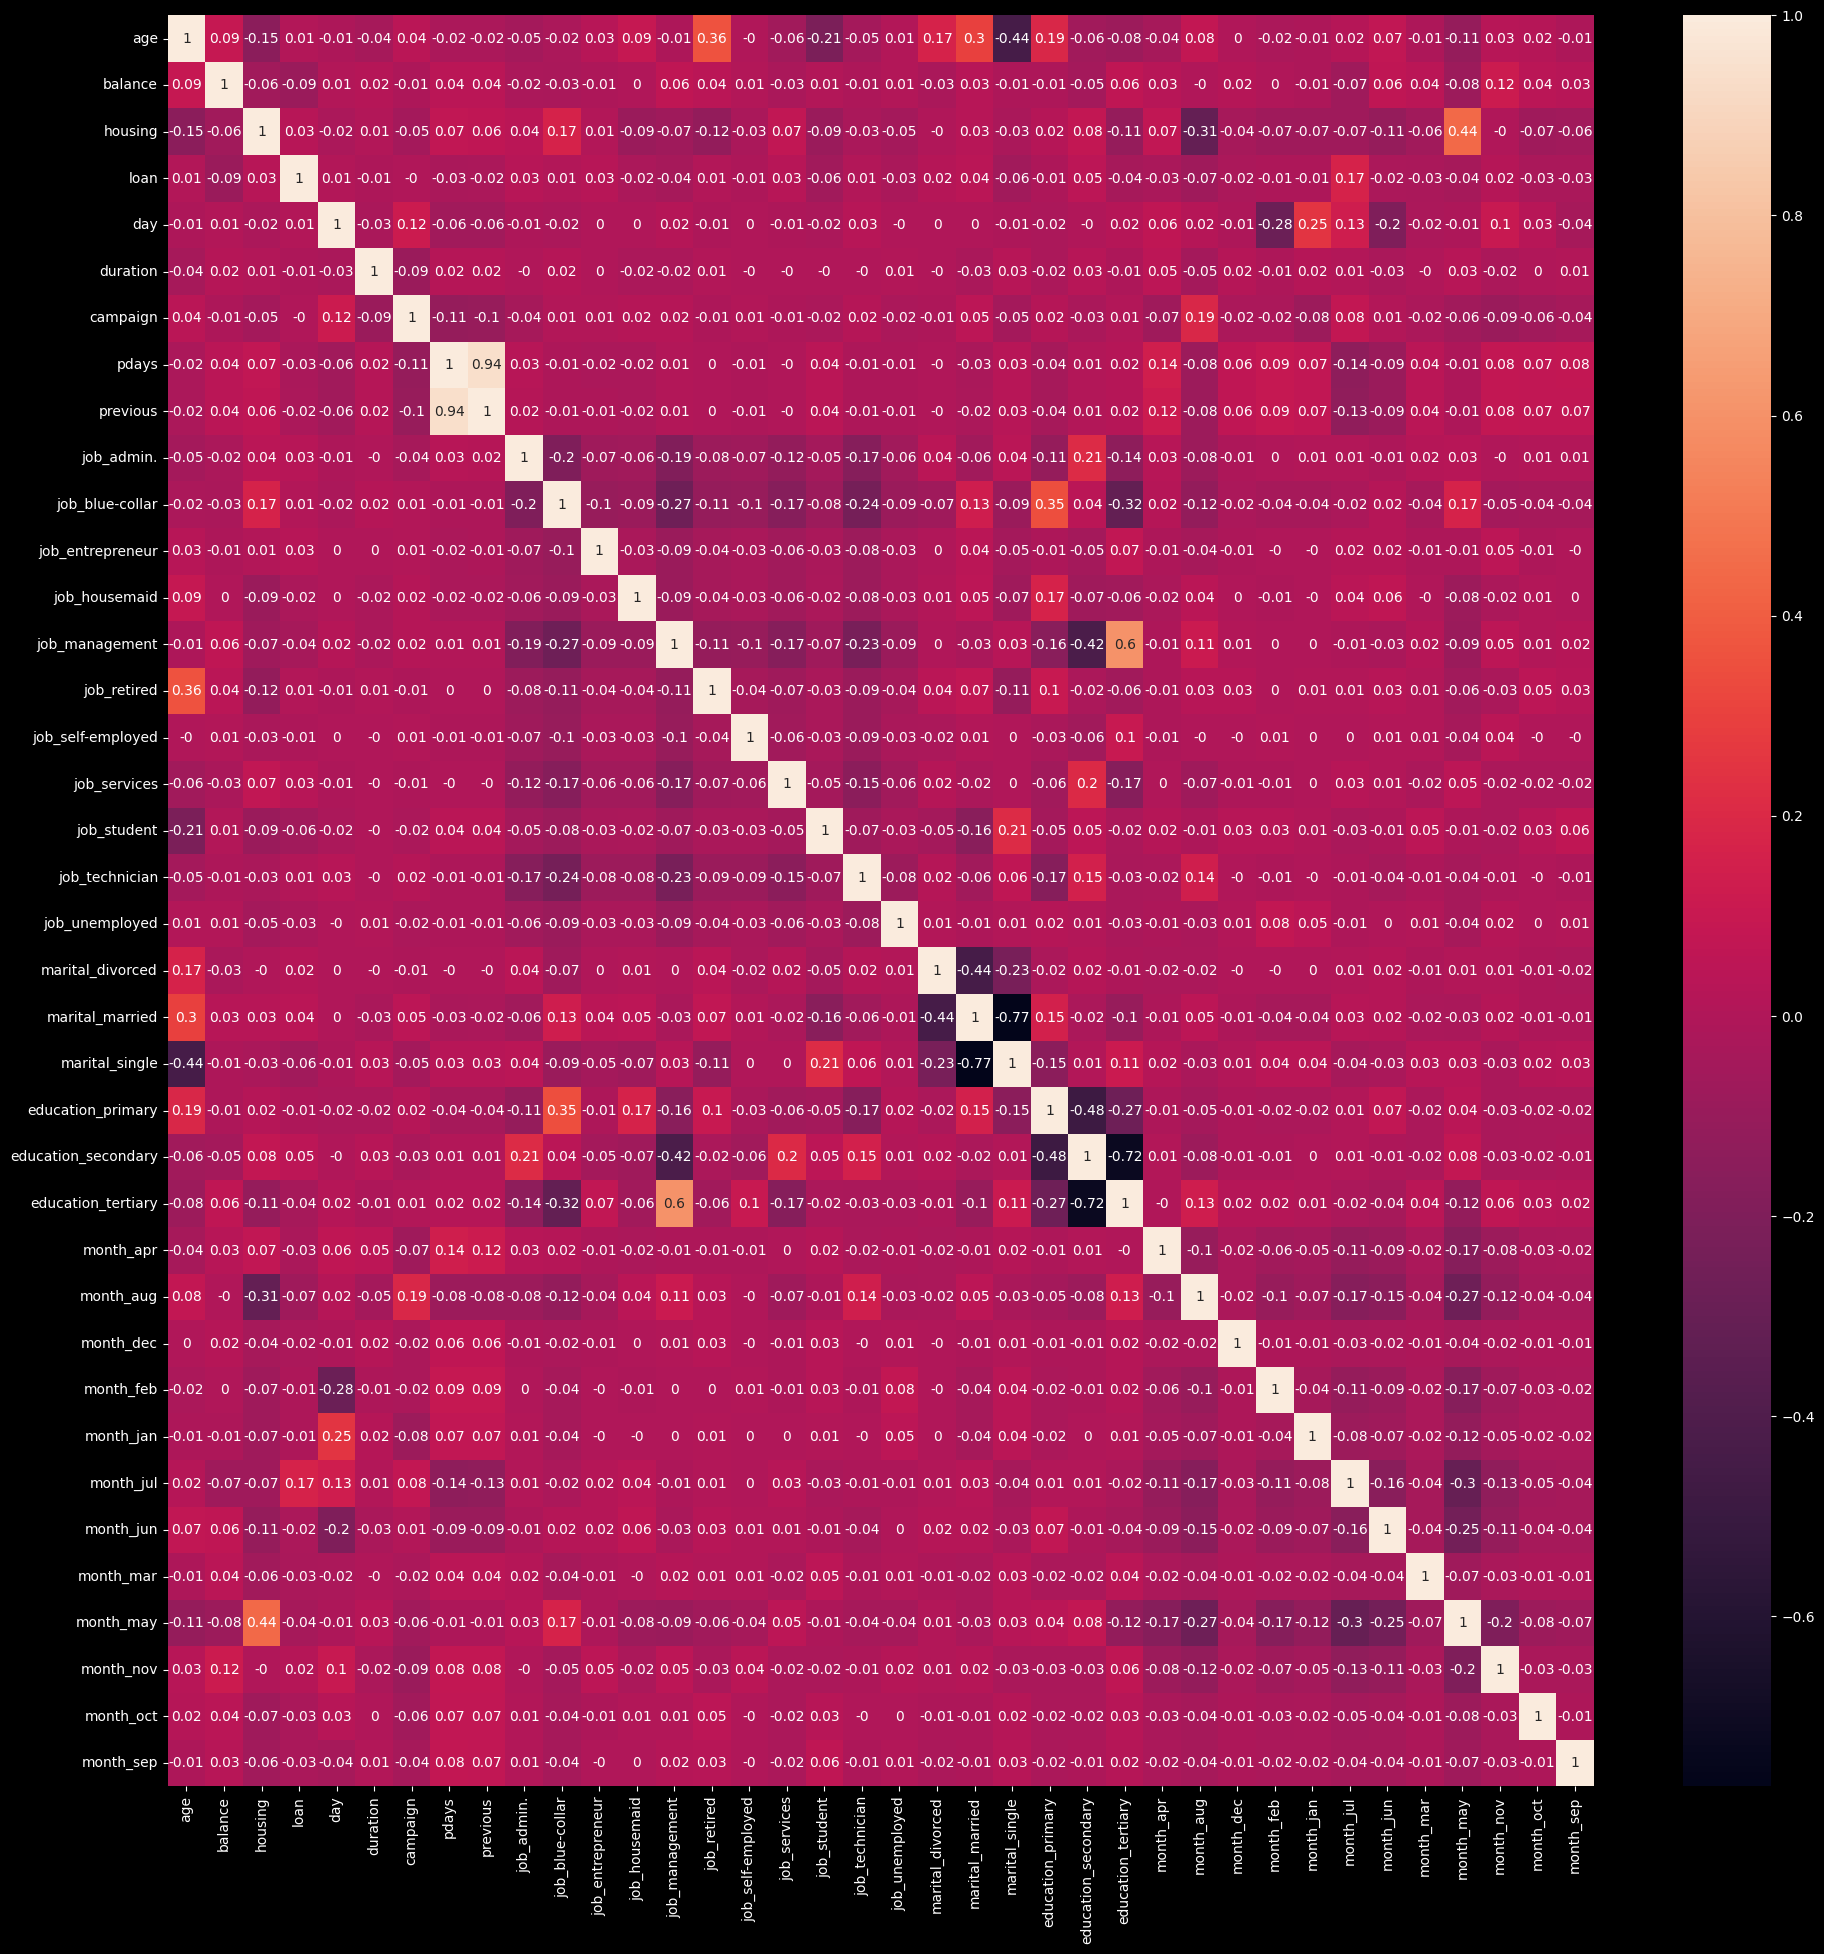

In [113]:
import seaborn as sns

fig, ax = plt.subplots(1,1, figsize=(23,23))
sns.heatmap(data.drop(['y'], axis=1).corr().round(2), annot=True, ax=ax)

In [114]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
data.drop(columns=to_drop, inplace=True)
to_drop

['previous']

In [115]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

skb = SelectKBest(mutual_info_classif, k='all').fit(data.drop(['y'], axis=1), data['y'])

In [116]:
pd.Series(skb.scores_, index=skb.get_feature_names_out()).sort_values(ascending=False)

duration               0.029476
housing                0.016294
balance                0.014387
age                    0.010758
pdays                  0.009398
day                    0.008953
month_may              0.007991
month_mar              0.007478
marital_married        0.007112
month_oct              0.006189
education_tertiary     0.005860
month_sep              0.004681
campaign               0.004531
education_secondary    0.004406
month_apr              0.004306
job_blue-collar        0.003367
marital_single         0.003019
job_student            0.002603
month_jun              0.002379
job_services           0.002279
education_primary      0.002256
job_technician         0.002210
job_entrepreneur       0.002078
month_dec              0.001829
loan                   0.001693
job_retired            0.001692
month_jul              0.001665
job_unemployed         0.001374
month_feb              0.001077
month_aug              0.000616
job_management         0.000515
job_self

In [117]:
from sklearn.feature_selection import SelectKBest, f_classif

skb = SelectKBest(f_classif, k='all').fit(data.drop(['y'], axis=1), data['y'])

pd.Series(skb.scores_, index=skb.get_feature_names_out()).sort_values(ascending=False)

duration               2402.476730
month_mar               990.627251
pdays                   871.668985
housing                 801.734021
month_oct               795.284884
month_sep               510.021664
month_may               436.108901
job_student             332.138144
month_apr               282.926255
month_dec               247.183611
balance                 220.341857
marital_single          218.694374
campaign                209.069463
education_tertiary      199.976523
job_blue-collar         194.987965
loan                    166.812061
marital_married         159.713912
education_primary       128.262024
month_jul                82.160714
month_feb                61.774969
job_management           61.295787
job_retired              53.367990
job_services             30.505225
day                      22.501065
education_secondary      21.839596
age                      13.577552
job_unemployed           13.454006
job_entrepreneur         11.088240
job_admin.          

In [118]:
feats = ['duration', 'housing', 'balance', 'marital_married', 'month_may',
       'job_blue-collar', 'pdays', 'education_primary',
       'month_mar', 'education_tertiary', 'education_secondary', 'loan',
       'day', 'campaign']

X = data[feats].copy()

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size=0.2)

### KMeans

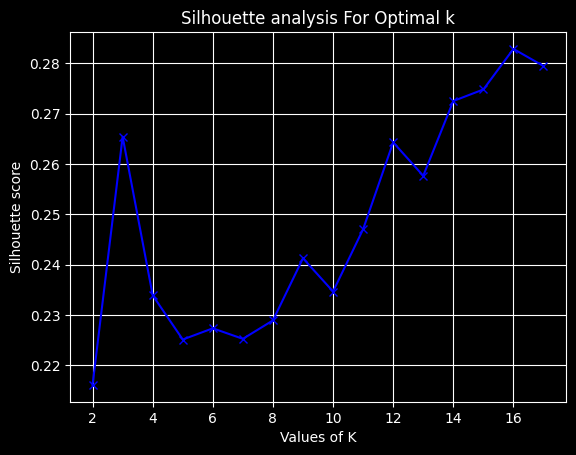

In [120]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


silhouette_scores = []

K = range(2, 18)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.grid(True)
plt.show()

In [121]:
print(silhouette_scores)

[0.21608780363224028, 0.265403225226482, 0.23388920103182767, 0.2251087273822373, 0.22733523799587546, 0.2252441490761797, 0.2289060444806863, 0.2412562280873277, 0.23464251734269967, 0.2470259158923614, 0.264287368588217, 0.25763670756814516, 0.2724945568883943, 0.2747926917341674, 0.2828483407669003, 0.2794492970746672]


In [122]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

kmeans = KMeans(n_clusters=14, random_state=42, n_init = 10)
kmeans.fit(X_train)
kmeans_labels = kmeans.labels_

print("K-Means Silhouette Score:", silhouette_score(X_train, kmeans_labels))
print("K-Means Calinski-Harabasz Score:", calinski_harabasz_score(X_train, kmeans_labels))
print("K-Means Davies-Bouldin Score:", davies_bouldin_score(X_train, kmeans_labels))

K-Means Silhouette Score: 0.2724945568883943
K-Means Calinski-Harabasz Score: 4105.7445366933025
K-Means Davies-Bouldin Score: 1.4331459593653233


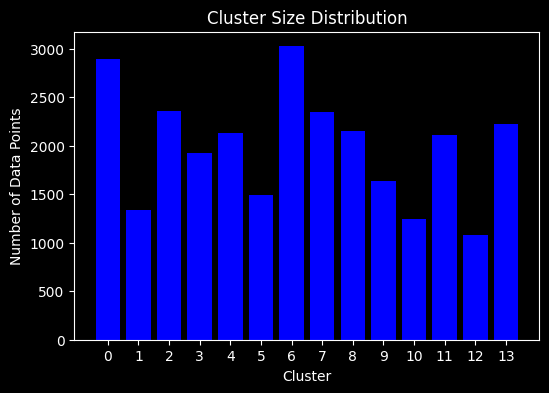

In [123]:
unique, counts = np.unique(kmeans_labels, return_counts=True)

plt.figure(figsize=(6,4))
plt.bar(unique, counts, align='center', color='blue')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Cluster Size Distribution')
plt.xticks(unique)
plt.show()

In [124]:
kmeans.predict(X_test)

array([ 0,  9, 11, ...,  7,  4,  9], dtype=int32)

In [125]:
data['y'].shape, kmeans.predict(X_test).shape

((34919,), (6984,))

### PCA

In [126]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

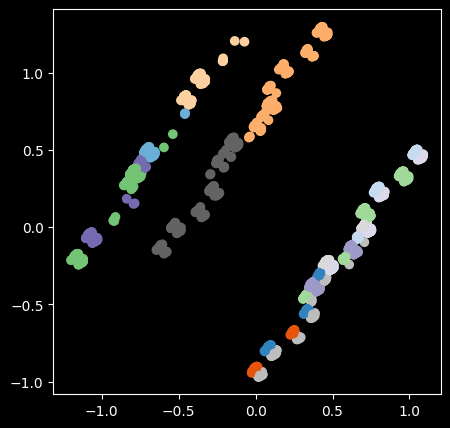

In [127]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(X_test_2d[:,0], X_test_2d[:,1], c=kmeans.predict(X_test), cmap='tab20c')

### DBSCAN

In [128]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(n_jobs=-1)
dbscan.fit(X_train)
dbscan_labels = dbscan.labels_

n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters found: {n_clusters}")

Number of clusters found: 149


Text(0, 0.5, 'Distance')

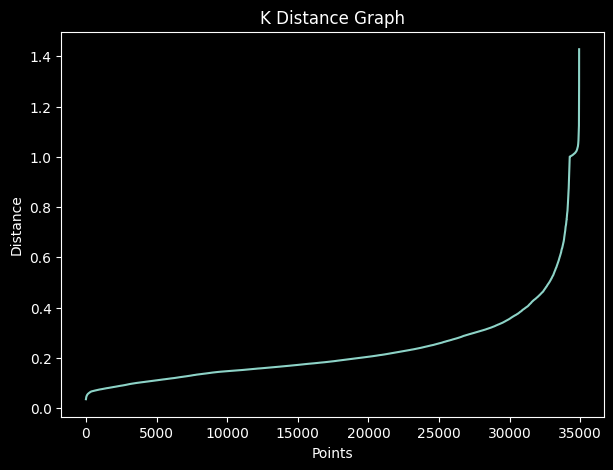

In [129]:
# finding the Optimal value of EPS
from sklearn.neighbors import NearestNeighbors

k=20
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,k-1], axis=0)

fig = plt.figure(figsize=(7, 5))
plt.plot(distances)
plt.title('K Distance Graph')
plt.xlabel("Points")
plt.ylabel("Distance")

In [140]:
dbscan = DBSCAN(eps=1, min_samples=6)
dbscan.fit(X_train)
dbscan_labels = dbscan.labels_

n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters found: {n_clusters}")

print("DBSCAN Silhouette Score:", silhouette_score(X_train, dbscan_labels))
print("DBSCAN Calinski-Harabasz Score:", calinski_harabasz_score(X_train, dbscan_labels))
print("DBSCAN Davies-Bouldin Score:", davies_bouldin_score(X_train, dbscan_labels))

Number of clusters found: 140
DBSCAN Silhouette Score: 0.38079374032291663
DBSCAN Calinski-Harabasz Score: 942.883210055562
DBSCAN Davies-Bouldin Score: 1.2916916014522575


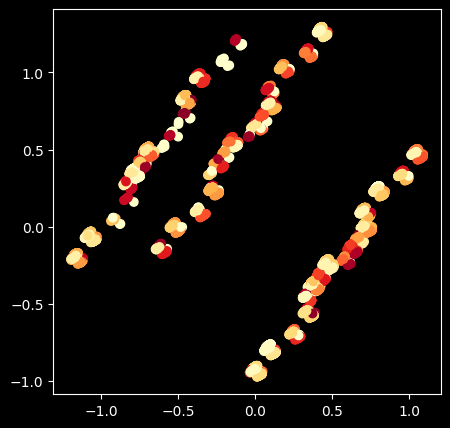

In [131]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

ax.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=dbscan.labels_, cmap='YlOrRd')

In [141]:
data = pd.read_csv('../data/data_cleaned.csv')
data

,age,balance,housing,loan,day,duration,campaign,pdays,previous,y,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.769231,0.583969,1,0,0.133333,0.406299,0.000000,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.500000,0.360123,1,0,0.133333,0.233071,0.000000,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.288462,0.357264,1,1,0.133333,0.114961,0.000000,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.557692,0.516518,1,0,0.133333,0.140157,0.000000,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.326923,0.381512,1,0,0.133333,0.214173,0.000000,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34914,0.365385,0.508259,0,0,0.500000,0.519685,0.142857,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34915,0.307692,0.416031,0,0,0.533333,0.348031,0.000000,0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34916,0.096154,0.369017,0,0,0.533333,0.414173,0.000000,0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34917,0.134615,0.410525,0,1,0.533333,0.603150,0.142857,0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [142]:
from sklearn.feature_selection import VarianceThreshold

threshold = 0.1

selector = VarianceThreshold(threshold=threshold)
selector.fit(data)
selected_features = data.columns[selector.get_support()]

print("\nSelected features based on variance:")
print(selected_features)


Selected features based on variance:
Index(['housing', 'loan', 'pdays', 'job_admin.', 'job_blue-collar',
       'job_management', 'job_technician', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'month_aug', 'month_jul',
       'month_jun', 'month_may'],
      dtype='object')


In [143]:
feats = ['housing', 'loan', 'pdays', 'job_admin.', 'job_blue-collar',
       'job_management', 'job_technician', 'education_primary',
       'education_secondary', 'education_tertiary', 'month_aug', 'month_jul',
       'month_jun', 'month_may']

X = data[feats].copy()

In [144]:
X_train, X_test = train_test_split(X, test_size=0.2)

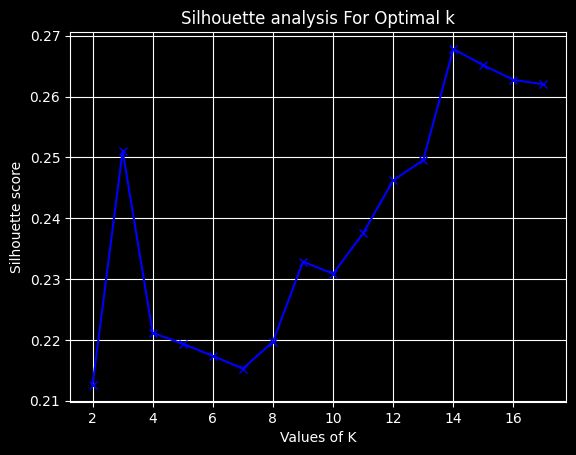

In [145]:
silhouette_scores = []

K = range(2, 18)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.grid(True)
plt.show()

In [146]:
print(silhouette_scores)

[0.21258077528338953, 0.2510685224149017, 0.2211358924312429, 0.21934799456926027, 0.21734153696893568, 0.21526770155121897, 0.2196596311507867, 0.23285988965244436, 0.2308619933333322, 0.2375261460877437, 0.2462177938116291, 0.24956121177745993, 0.26782863428154163, 0.2651407229386029, 0.26274616337167406, 0.26200088301727253]


In [147]:
kmeans = KMeans(n_clusters=14, random_state=42, n_init = 10)
kmeans.fit(X_train)
kmeans_labels = kmeans.labels_

print("K-Means Silhouette Score:", silhouette_score(X_train, kmeans_labels))
print("K-Means Calinski-Harabasz Score:", calinski_harabasz_score(X_train, kmeans_labels))
print("K-Means Davies-Bouldin Score:", davies_bouldin_score(X_train, kmeans_labels))

K-Means Silhouette Score: 0.26782863428154163
K-Means Calinski-Harabasz Score: 3404.9637848394664
K-Means Davies-Bouldin Score: 1.5746250878234227


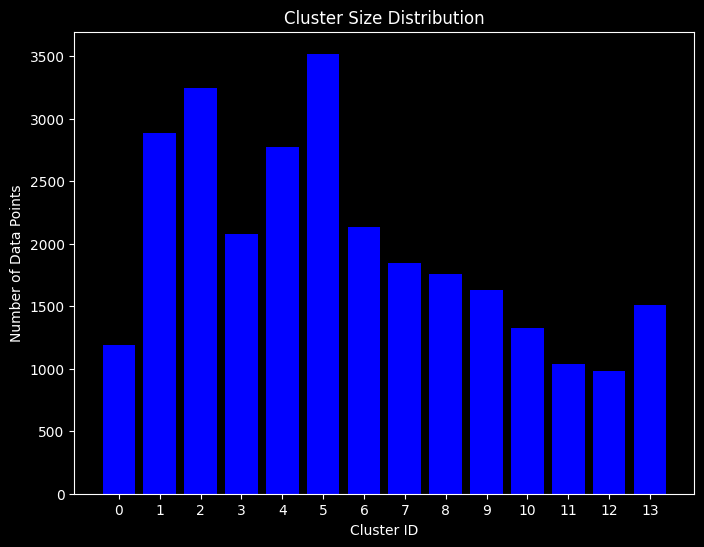

In [148]:
unique, counts = np.unique(kmeans_labels, return_counts=True)

plt.figure(figsize=(8, 6))
plt.bar(unique, counts, align='center', color='blue')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Data Points')
plt.title('Cluster Size Distribution')
plt.xticks(unique)
plt.show()

In [149]:
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

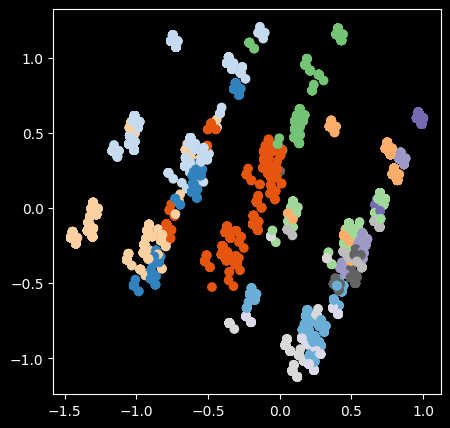

In [151]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(X_test_2d[:,0], X_test_2d[:,1], c=kmeans.predict(X_test), cmap='tab20c')

In [153]:
dbscan = DBSCAN(n_jobs=-1)
dbscan.fit(X_train)
dbscan_labels = dbscan.labels_

n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters found: {n_clusters}")

Number of clusters found: 336


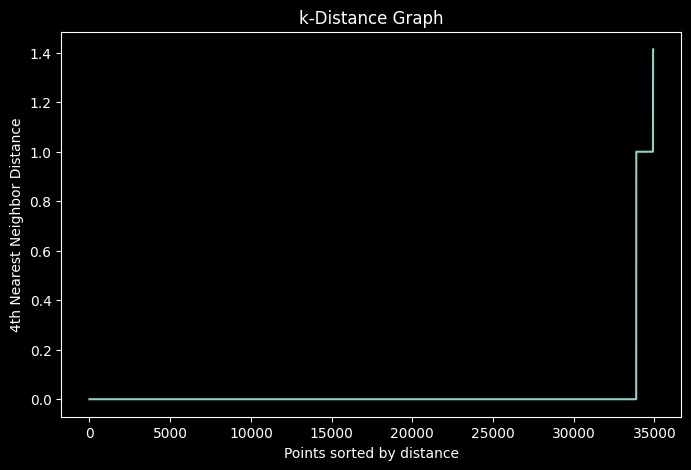

In [154]:
from sklearn.neighbors import NearestNeighbors

k = 15
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances[:, k-1], axis=0)

plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('k-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.show()

In [157]:
dbscan = DBSCAN(eps=1, min_samples=6)
dbscan.fit(X_train)
dbscan_labels = dbscan.labels_

n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters found: {n_clusters}")

print("DBSCAN Silhouette Score:", silhouette_score(X_train, dbscan_labels))
print("DBSCAN Calinski-Harabasz Score:", calinski_harabasz_score(X_train, dbscan_labels))
print("DBSCAN Davies-Bouldin Score:", davies_bouldin_score(X_train, dbscan_labels))

Number of clusters found: 3
DBSCAN Silhouette Score: 0.2510685224149017
DBSCAN Calinski-Harabasz Score: 6206.0261389647185
DBSCAN Davies-Bouldin Score: 1.61839220203375


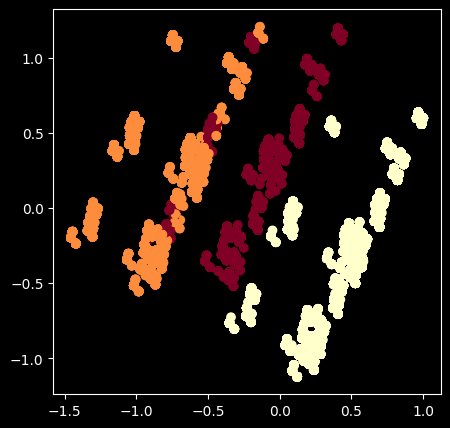

In [158]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

ax.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=dbscan.labels_, cmap='YlOrRd')